# DA_HW_3 Support Vector Machine and Decision Trees

# Due on 5/10 23:59 pm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## We will use the same affair dataset from HW2, but will skip the EDA phrase we have done enough of it

#### Everything removing outliers, create dummies variabes had been done for you

In [2]:
# Remember the affair data set from HW3, we will use that dataset again
# but we will directly load it from the API
orig_df = pd.read_csv("affairs2.csv")
# Set up our target class label
orig_df['had_affair'] = orig_df['affairs'].apply(lambda x: 1 if x != 0 else 0)
orig_df = orig_df.drop('affairs',axis=1)
# remove NA
orig_df.dropna(inplace=True)
# create dummies variable for occupation
occ = pd.get_dummies(orig_df['occupation'],drop_first=True)
# we include rate_marriage feature as well. In HW3, we did not include that variable
features = ['rate_marriage','age','yrs_married','children','religious','educ', 'had_affair']
df = orig_df
df = pd.concat([orig_df[features], occ], axis=1)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,had_affair,occ2,occ3,occ4,occ5,occ6
0,3.0,32.0,9.0,3.0,3.0,17.0,1,1,0,0,0,0
1,3.0,27.0,13.0,3.0,1.0,14.0,1,0,1,0,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1,0,1,0,0,0
3,4.0,37.0,16.5,4.0,3.0,16.0,1,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,1,0,1,0,0,0


In [3]:
# make sure there is no missing values
df.isnull().sum()

rate_marriage    0
age              0
yrs_married      0
children         0
religious        0
educ             0
had_affair       0
occ2             0
occ3             0
occ4             0
occ5             0
occ6             0
dtype: int64

### Now we are ready to build models

### Question 1: Build a classification model using SVC using linear kernel without specifying the C-parameter

In [4]:
from sklearn import svm
model = svm.SVC(kernel = 'linear')

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(df.drop('had_affair', axis = 1),
                                                    df['had_affair'], test_size = 0.20,
                                                    random_state = 101)

model.fit(X_train, Y_train)

predictions = model.predict(X_test)

In [6]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       850
           1       0.64      0.27      0.38       424

    accuracy                           0.71      1274
   macro avg       0.68      0.60      0.59      1274
weighted avg       0.69      0.71      0.67      1274

0.707221350078493


The results show the accuracy of 71% which is good. The precision for those who had NOT had an affair (Case 0) shows a great precision (meaning results are VERY relevant) and a great recall (meaning the accuracy of the model is VERY accurate). The precision for case 1 is good (at 64%) and the recall was bad (model not very accurate for this case). 

### Question 2. Now try different value of C-parameter and rerun your model

In [7]:
model = svm.SVC(kernel = 'linear', C = 10)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

In [8]:
print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81       850
           1       0.64      0.27      0.38       424

    accuracy                           0.71      1274
   macro avg       0.68      0.60      0.59      1274
weighted avg       0.69      0.71      0.66      1274

0.7056514913657771


In [9]:
model = svm.SVC(kernel = 'linear', C = 1)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

In [10]:
print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       850
           1       0.64      0.27      0.38       424

    accuracy                           0.71      1274
   macro avg       0.68      0.60      0.59      1274
weighted avg       0.69      0.71      0.67      1274

0.707221350078493


In [11]:
model = svm.SVC(kernel = 'linear', C = 0.05)
model.fit(X_train, Y_train)
predictions = model.predict(X_test) # Predict the SVC model on the X_test data set 

In [12]:
print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions)) # Compares the actual results to the models predicted results 

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       850
           1       0.65      0.26      0.37       424

    accuracy                           0.71      1274
   macro avg       0.68      0.60      0.59      1274
weighted avg       0.69      0.71      0.66      1274

0.707221350078493


### Question 3. Now use rbf as your kernel along with different value for Gamma and C

In [13]:
model = svm.SVC(kernel = 'rbf', gamma = 2**-1, C = 10)

model.fit(X_train, Y_train)

predictions = model.predict(X_test)

print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75       850
           1       0.47      0.39      0.43       424

    accuracy                           0.65      1274
   macro avg       0.59      0.58      0.59      1274
weighted avg       0.64      0.65      0.64      1274

0.6483516483516484


In [14]:
model = svm.SVC(kernel = 'rbf', gamma = 2**-1, C = 1)

model.fit(X_train, Y_train)

predictions = model.predict(X_test)

print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.86      0.78       850
           1       0.52      0.31      0.39       424

    accuracy                           0.68      1274
   macro avg       0.62      0.59      0.59      1274
weighted avg       0.65      0.68      0.65      1274

0.6766091051805337


In [15]:
model = svm.SVC(kernel = 'rbf', gamma = 1)

model.fit(X_train, Y_train)

predictions = model.predict(X_test)

print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.70      0.87      0.77       850
           1       0.47      0.24      0.32       424

    accuracy                           0.66      1274
   macro avg       0.58      0.55      0.55      1274
weighted avg       0.62      0.66      0.62      1274

0.6577708006279435


In [16]:
model = svm.SVC(kernel = 'rbf', gamma = 2)

model.fit(X_train, Y_train)

predictions = model.predict(X_test)

print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.88      0.77       850
           1       0.40      0.16      0.23       424

    accuracy                           0.64      1274
   macro avg       0.54      0.52      0.50      1274
weighted avg       0.59      0.64      0.59      1274

0.6420722135007849


In [17]:
model = svm.SVC(kernel = 'rbf', gamma = 2**-4, C = .05)

model.fit(X_train, Y_train)

predictions = model.predict(X_test)

print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80       850
           1       0.75      0.02      0.04       424

    accuracy                           0.67      1274
   macro avg       0.71      0.51      0.42      1274
weighted avg       0.70      0.67      0.55      1274

0.6718995290423861


In [18]:
model = svm.SVC(kernel = 'rbf', gamma = 2**-4, C = 1)

model.fit(X_train, Y_train)

predictions = model.predict(X_test)

print(classification_report(Y_test, predictions))
print(accuracy_score(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.90      0.81       850
           1       0.62      0.32      0.42       424

    accuracy                           0.71      1274
   macro avg       0.67      0.61      0.61      1274
weighted avg       0.69      0.71      0.68      1274

0.7080062794348508


Based on the C and Gamma parameters I tested. I have determined that it is best for the gamma to be low (in my case the best choice for Gamma was 2**-4) and for C it is best for it to not be too low (Don't be < 1). So in my case C = 1. 

The best results shown were:
- C = 1
- Gamma = 2**-4

- The best result was the kernel that used rbf that had an accuracy score of 71%.

# Now we will try to fit the same dataset with Decision Trees

### Question 5. Build a Decision Tree Classifier using default parameter

In [19]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [20]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
predictions = model.predict(X_test)
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

[[650 200]
 [259 165]]
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       850
           1       0.45      0.39      0.42       424

    accuracy                           0.64      1274
   macro avg       0.58      0.58      0.58      1274
weighted avg       0.63      0.64      0.63      1274

0.6397174254317112


### Question 6. Now try using max_depth = 2, 3, 4 and crierion = 'gini' and 'entropy' to build 3 X 2 = 6 different models

In [21]:
model1 = DecisionTreeClassifier(max_depth = 2, criterion = 'gini')
model1.fit(X_train,Y_train)

predictions = model1.predict(X_test)
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

[[765  85]
 [290 134]]
              precision    recall  f1-score   support

           0       0.73      0.90      0.80       850
           1       0.61      0.32      0.42       424

    accuracy                           0.71      1274
   macro avg       0.67      0.61      0.61      1274
weighted avg       0.69      0.71      0.67      1274

0.7056514913657771


In [22]:
model2 = DecisionTreeClassifier(max_depth = 3, criterion = 'gini')
model2.fit(X_train,Y_train)

predictions = model2.predict(X_test)
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

[[734 116]
 [277 147]]
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       850
           1       0.56      0.35      0.43       424

    accuracy                           0.69      1274
   macro avg       0.64      0.61      0.61      1274
weighted avg       0.67      0.69      0.67      1274

0.6915227629513344


In [23]:
model3 = DecisionTreeClassifier(max_depth = 4, criterion = 'gini')
model3.fit(X_train,Y_train)

predictions = model3.predict(X_test)
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

[[761  89]
 [290 134]]
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       850
           1       0.60      0.32      0.41       424

    accuracy                           0.70      1274
   macro avg       0.66      0.61      0.61      1274
weighted avg       0.68      0.70      0.67      1274

0.7025117739403454


In [24]:
model4 = DecisionTreeClassifier(max_depth = 2, criterion = 'entropy')
model4.fit(X_train,Y_train)

predictions = model4.predict(X_test)
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

[[765  85]
 [290 134]]
              precision    recall  f1-score   support

           0       0.73      0.90      0.80       850
           1       0.61      0.32      0.42       424

    accuracy                           0.71      1274
   macro avg       0.67      0.61      0.61      1274
weighted avg       0.69      0.71      0.67      1274

0.7056514913657771


In [25]:
model5 = DecisionTreeClassifier(max_depth = 3, criterion = 'entropy')
model5.fit(X_train,Y_train)

predictions = model5.predict(X_test)
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

[[734 116]
 [277 147]]
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       850
           1       0.56      0.35      0.43       424

    accuracy                           0.69      1274
   macro avg       0.64      0.61      0.61      1274
weighted avg       0.67      0.69      0.67      1274

0.6915227629513344


In [26]:
model6 = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
model6.fit(X_train,Y_train)

predictions = model6.predict(X_test)
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))
print(accuracy_score(Y_test, predictions))

[[761  89]
 [290 134]]
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       850
           1       0.60      0.32      0.41       424

    accuracy                           0.70      1274
   macro avg       0.66      0.61      0.61      1274
weighted avg       0.68      0.70      0.67      1274

0.7025117739403454


### Question 7. What is your obsevation from Question 6? Does the choice of the criterion important in this case? What about the max_depth? What is the best choice of max_depth and criterion?

Based on the 6 different models they all yielded pretty similar results. In our case, the criterion does NOT seem important in our case. When we compare the different criterion at the SAME max_depth, the results are very close. Similar to the criterion, the max_depth is NOT important in our case. The max_depth at 1 is greater than 2, but max_depth at 2 is less than max_depth at 3.

If we had to pick a best choice of max_detph and criterion (despite the results yielding similar numbers), a max_depth = 2 and criterion = gini or entropy.

The best choice wouldn't make too much sense in our case since the results are VERY similar

### Question 8, now pick three models, with max_depth = 2, 3 and 4. You can pick the which ever criterions you want and visual the three trees

In [27]:
# Hint 
# model1 = DecisionTreeClassifier(max_depth=..., criterion= ...)
# model1.fit(X_train, y_train)
# model2 = DecisionTreeClassifier(max_depth=..., criterion= ...)
# model2.fit(X_train, y_train)
# model3 = DecisionTreeClassifier(max_depth=..., criterion= ...)
# model3.fit(X_train, y_train)
# Then display all 3 trees

In [29]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import io
import pydot 

features = list(df.columns[1:])
features

['age',
 'yrs_married',
 'children',
 'religious',
 'educ',
 'had_affair',
 'occ2',
 'occ3',
 'occ4',
 'occ5',
 'occ6']

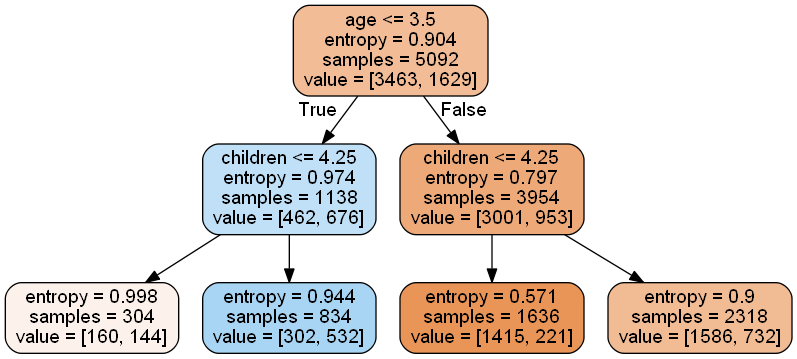

In [33]:
dot_data = StringIO()  
export_graphviz(model4, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

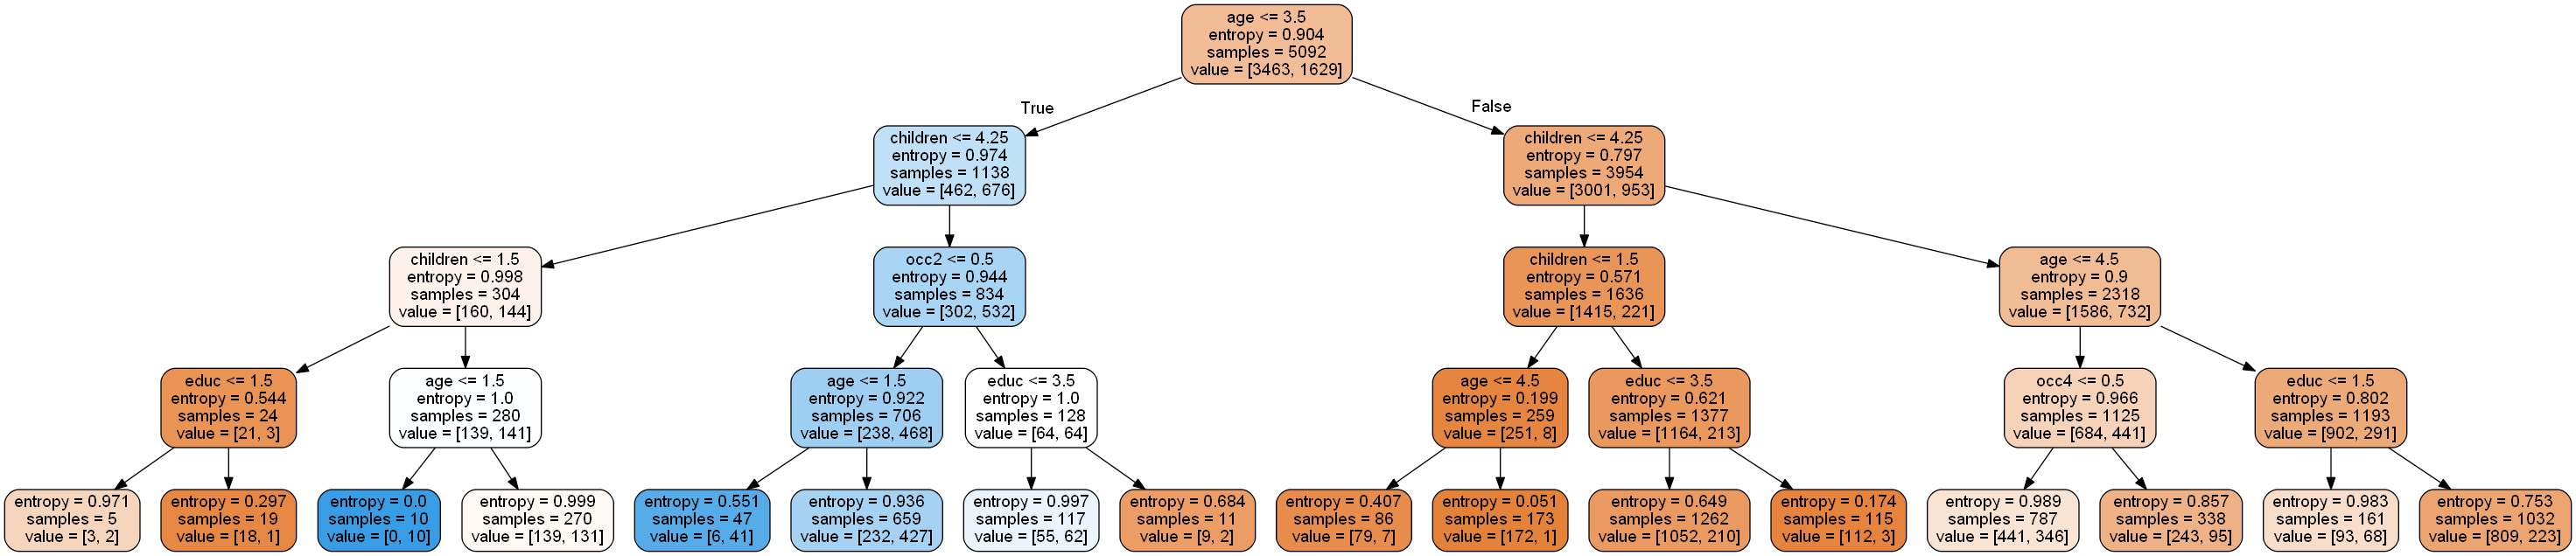

In [35]:
dot_data = StringIO()  
export_graphviz(model6, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

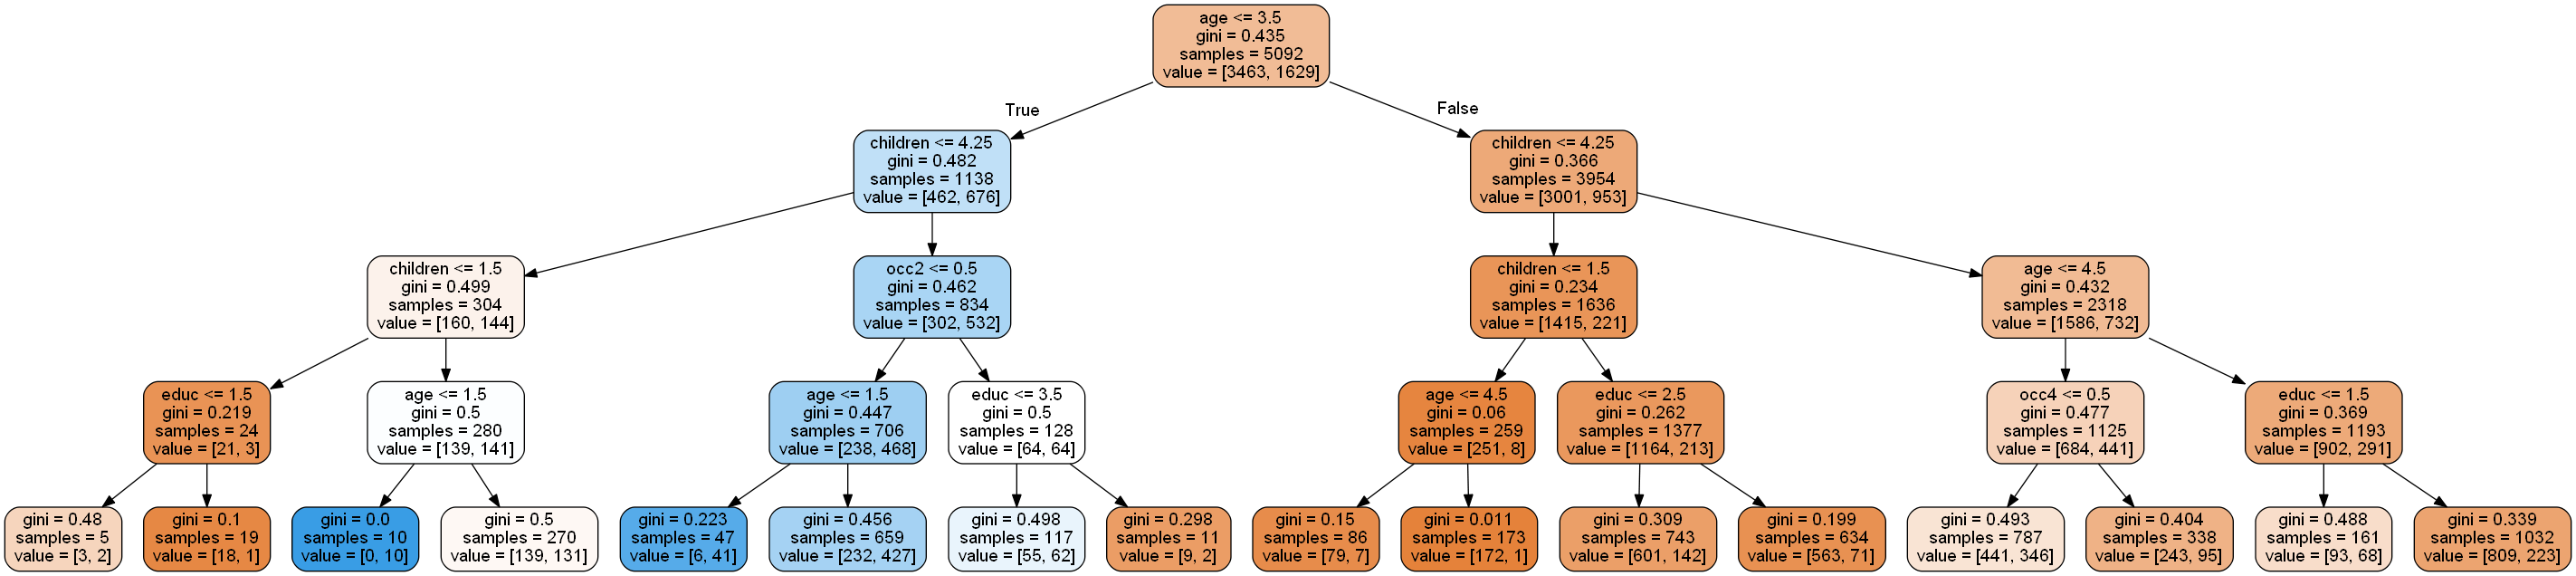

In [32]:
dot_data = StringIO()  
export_graphviz(model3, out_file=dot_data,feature_names=features,filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

### Question 9. Now build a Random Forest Classifier with, say, 100 trees. Check the model performance 

Type your answer and code here

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [38]:
rfc_pred = rfc.predict(X_test)

print(classification_report(Y_test,rfc_pred))
print(accuracy_score(Y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       850
           1       0.49      0.44      0.47       424

    accuracy                           0.66      1274
   macro avg       0.62      0.61      0.61      1274
weighted avg       0.66      0.66      0.66      1274

0.6640502354788069


The results show the accuracy of 66.4% which is good. The precision for those who had NOT had an affair (Case 0) shows a great precision at 74% (meaning results are VERY relevant) and a great recall at 77% (meaning the accuracy of the model is VERY accurate). The precision for case 1 was not at 49% and the recall was not bad as well at 44%. 